In [1]:
import numpy as np
import os
import random
import tensorflow as tf
import pathlib
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
working_path            = pathlib.Path().resolve()
path_object             = pathlib.Path(working_path)
parent_path             = path_object.parent
raw_data_path           = os.path.join(parent_path, "data/raw/training/")

In [3]:
split=0.15

In [14]:
np.int(144*0.15)

C:\Users\guthr\AppData\Local\Temp\ipykernel_18868\4192952303.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.int(144*0.15)


21

In [19]:
a[0:122].shape

(122,)

In [21]:
a[122:].shape

(22,)

In [33]:
# Reading the data oldschool like
data = []
groundtruth = []
Files = ['groundtruth', 'images']

for files in Files:
    cpath = os.path.join(raw_data_path, files)
    for img in os.listdir(cpath):
        image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_COLOR)
        if files=="images":
            data.append(image_array)
        else:
            groundtruth.append(image_array)
images = np.array(data)
masks =  np.array(masks)

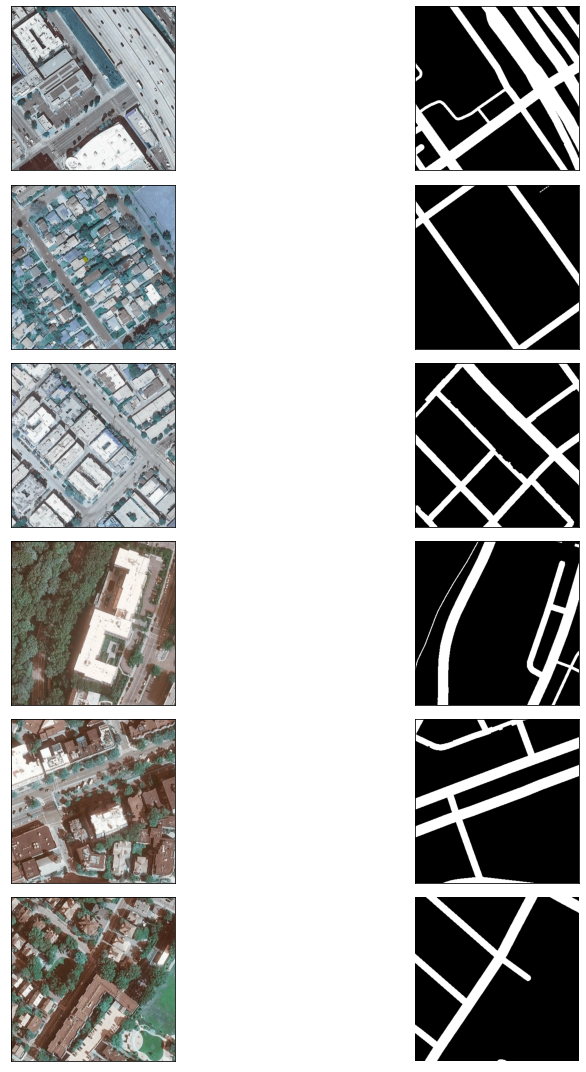

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

rows=6
cols = 2
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15),tight_layout=True)
k=0
for i in range(rows):
    for j in range(cols):        
        if j==1:
            axes[i, j].imshow(masks[k].astype(int))
        else:
            axes[i, j].imshow(images[k].astype(int))
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

    k+=1
plt.tight_layout
plt.axis('off')
plt.show()

In [43]:
def some_vals(images,masks):
    print("Shape Images: "+str(images.shape))
    print("Shape Masks: "+str(masks.shape))
    print("Max Images: "+str(np.max(images)))
    print("Max Masks: "+str(np.max(masks)))
    print("Min Images: "+str(np.min(images)))
    print("Min Masks: "+str(np.min(masks)))

In [44]:
some_vals(images,masks)

Shape Images: (144, 400, 400, 3)
Shape Masks: (144, 400, 400, 3)
Max Images: 255
Max Masks: 255.0
Min Images: 0
Min Masks: 0.0


In [50]:
import tensorflow as tf
rescale = tf.keras.layers.Rescaling(1./255)

In [47]:
some_vals(rescale(images),rescale(masks))

Shape Images: (144, 400, 400, 3)
Shape Masks: (144, 400, 400, 3)
Max Images: 1.0
Max Masks: 1.0
Min Images: 0.0
Min Masks: 0.0


In [52]:
some_vals(rescale(images),tf.image.rgb_to_grayscale(rescale(masks)))

Shape Images: (144, 400, 400, 3)
Shape Masks: (144, 400, 400, 1)
Max Images: 1.0
Max Masks: 0.99990004
Min Images: 0.0
Min Masks: 0.0


In [59]:
from enum import Enum
from tqdm import tqdm
# mask color codes
class MaskColorMap(Enum):
    Other = (0, 0, 0)
    Road = (255, 255, 255)

def one_hot_encode_masks(masks, num_classes):
    """
    :param masks: Y_train patched mask dataset 
    :param num_classes: number of classes
    :return: 
    """
    # initialise list for integer encoded masks
    integer_encoded_labels = []

    # iterate over each mask
    for mask in tqdm(masks):

        # get image shape
        _img_height, _img_width, _img_channels = mask.shape

        # create new mask of zeros
        encoded_image = np.zeros((_img_height, _img_width, 1)).astype(int)

        for j, cls in enumerate(MaskColorMap):
            encoded_image[np.all(mask == cls.value, axis=-1)] = j

        # append encoded image
        integer_encoded_labels.append(encoded_image)

    # return one-hot encoded labels
    return tf.keras.utils.to_categorical(y=integer_encoded_labels, num_classes=num_classes)

In [68]:
one_hot_masks = one_hot_encode_masks(masks,2)

100%|███████████████████████████████████████████████████████████████████████████████| 144/144 [00:01<00:00, 139.40it/s]


In [67]:
b

array([[[[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        ...,

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [0., 1.],
         [0., 1.],
         [0., 1.]]],


       [[[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
   